<a href="https://colab.research.google.com/github/savioratharv/Compute_tasks/blob/main/Atharv_Patawar_LogReg_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

###Q1 Import the dataset and try to understand what information each column is giving. What is our target variable? Is this a classification or regression problem?

Dataset link: https://drive.google.com/file/d/1A-iAsI3MUU6o9oh5AE1NG1kVU5KD60Ms/view?usp=sharing


Ans: This is a classification problem and the target variable is TenYearCHD

In [3]:
#Import dataset
df=pd.read_csv('heart_study.csv')

In [4]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


sex : male or female (Nominal)

age : age of the patient (Continuous)

education: maximum level of education of the patient

currentSmoker : whether or not the patient is a current smoker (Nominal)

cigsPerDay : the number of cigarettes that the person smoked on average in one day (Continuous)

BPMeds : whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke : whether or not the patient had previously had a stroke (Nominal)

prevalentHyp : whether or not the patient was Hypertension (Nominal)

diabetes : whether or not the patient had diabetes (Nominal)

totChol : total cholesterol level (Continuous)

sysBP : systolic blood pressure (Continuous)

diaBP : diastolic blood pressure (Continuous)

BMI : Body Mass Index (Continuous)

heartRate : heart rate (Continuous)

glucose : glucose level (Continuous)

TenYearCHD : 10 year risk of Coronary Heart Disease (CHD) (binary: 1 (Yes), 0 (No))

###Q2. Are there any columns which give information about something totally irrelevant to whether a person has a heart disease or not? If yes, drop the column. Also rename the column 'male' to 'sex_male'.

Ans: Yes education seems to be irrelevant, both from the correlation heatmap and logically otherwise

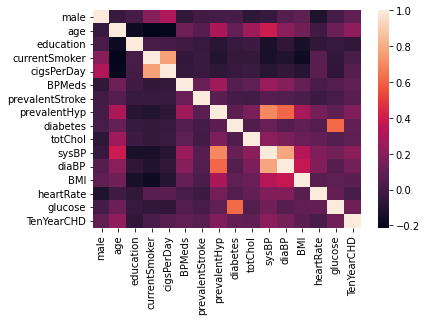

In [5]:
import seaborn as sns
sns.heatmap(df.corr())

In [6]:
#drop and/or rename columns
df.drop(['education'],axis=1,inplace=True)

In [7]:
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [8]:
df.rename(columns={'male':'sex_male'},inplace=True)

In [9]:
df

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


###Q3. Find the number of null values in each column and decide whether you can drop them or not. If you cannot drop them, use an appropriate method to deal with them

In [10]:
#Deal with null values
df.isnull().sum()

sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
df.drop(['glucose'],axis=1,inplace=True)         #dropping glucose, too many null values

In [12]:
df['cigsPerDay'].fillna(value=df['cigsPerDay'].mean(),inplace=True)        #filling cigsPerDay,totChol,BMI and heartRate with mean as they are continuous and have relatively few null values

In [13]:
df['BPMeds'].fillna(value=df['BPMeds'].mode()[0],inplace=True)             #filling BPMeds with mode as it is nominal abd has relatively few null values

In [14]:
df['totChol'].fillna(value=df['totChol'].mean(),inplace=True)

In [15]:
df['BMI'].fillna(value=df['BMI'].mean(),inplace=True)

In [16]:
df['heartRate'].fillna(value=df['heartRate'].mean(),inplace=True)

In [17]:
df.isnull().sum()

sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
TenYearCHD         0
dtype: int64

In [18]:
df

,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,0


###Q4. The following code is set up for you, replace 'dataframe' with the name of the your variable. What do you understand from this EDA? Why do some graphs have only two bars, at 0 and 1 and others have multiple?

This EDA plots every available feature with all other features, as some features are nominal, there are only two bars at 0 and 1

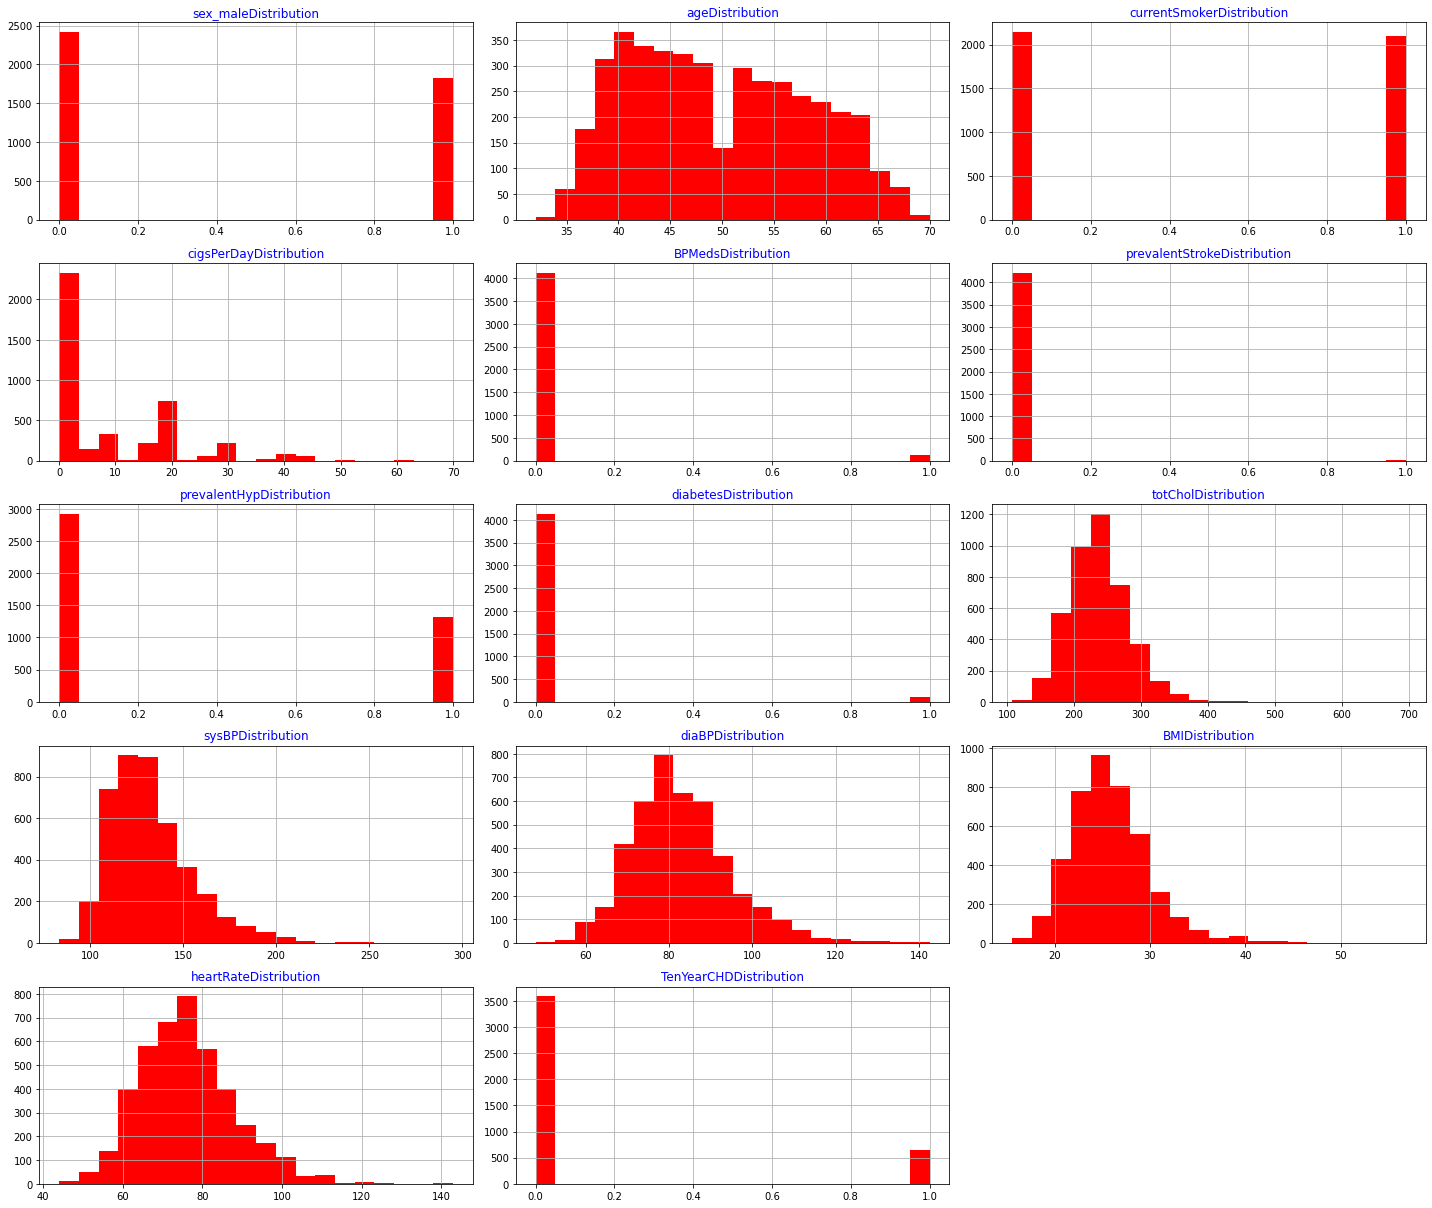

In [19]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='red')
        ax.set_title(feature+"Distribution", color='blue')
    fig.tight_layout()
    plt.show()
draw_histograms(df, df.columns, 6, 3)

###Q5. Using sns.countplot find out number of Positive cases and Negative cases in the dataset, i.e., in your target column.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


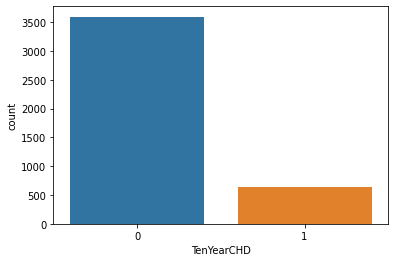

In [20]:
#Code
sns.countplot(df['TenYearCHD'])

###Q6a. Split the dataset into train and test and fit the training dataset in the Logistic Regression. 

In [21]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values

In [22]:
#Split the dataset and fit the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [23]:
#scaling values so that they have equal importance
from sklearn.preprocessing import StandardScaler          
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)   #fitting the model

LogisticRegression(random_state=0)

In [25]:
y_pred = classifier.predict(X_test)    #predictions

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[895   6]
 [145  14]]


0.8575471698113207

###Q6b. Does running the above code give a Convergence Warning? What could be the cause of this problem? Try to find out methods that can deal with this problem.

Although there are several methods, we will use backward feature selection to solve this problem. You can learn more about feature selection using the below link. 

https://www.javatpoint.com/feature-selection-techniques-in-machine-learning

Understand and run the following 4 cells which carry out backward feature selection for you. Make sure to replace 'df' by your dataframe variable

In [27]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0


In [28]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols = df_constant.columns[:-1]
model = sm.Logit(df.TenYearCHD, df_constant[cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.379709
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4226
Method:                           MLE   Df Model:                           13
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                  0.1086
Time:                        14:01:54   Log-Likelihood:                -1610.0
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 9.574e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.7449      0.626    -12.365      0.000      -8.973      -6.517
sex_male            0.5119      0.100      5.112      0.000       0.316       0.708
age                 0.0627      0.006     10.169      0.000       0.051       0.075
currentSmoker       0.0160      0.144      0.111      0.912      -0.266       0.298
cigsPerDay          0.0207      0.006      3.628      0.000       0.010       0.032
BPMeds              0.2374      0.219      1.085      0.278      -0.192       0.666
prevalentStroke     0.9916      0.441      2.248      0.025       0.127       1.856
prevalentHyp        0.2205      0.128      1.720      0.085      -0.031       0.472
diabetes            0.7725      0.219      3.533      0.000       0.344       1.201
totChol             0.0018      0.001      1.781      0.075      -0.000       0.004
sysBP               0.0148      0.004      4.214      0.000       0.008       0.022
diaBP              -0.0038      0.006     -0.633      0.527      -0.015       0.008
BMI                 0.0042      0.012      0.359      0.719      -0.019       0.027
heartRate          -0.0005      0.004     -0.134      0.893      -0.008       0.007
===================================================================================
"""

In [29]:
def back_feature_elem (data_frame, dep_var, col_list):
    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)
result = back_feature_elem(df_constant, df.TenYearCHD, cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4233
Method:                           MLE   Df Model:                            6
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                  0.1063
Time:                        14:01:54   Log-Likelihood:                -1614.1
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 7.480e-80
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9005      0.372    -21.230      0.000      -8.630      -7.171
sex_male            0.4848      0.097      4.999      0.000       0.295       0.675
age                 0.0650      0.006     10.985      0.000       0.053       0.077
cigsPerDay          0.0212      0.004      5.513      0.000       0.014       0.029
prevalentStroke     1.0687      0.436      2.449      0.014       0.213       1.924
diabetes            0.7937      0.217      3.660      0.000       0.369       1.219
sysBP               0.0173      0.002      8.664      0.000       0.013       0.021
===================================================================================
"""

In [30]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue = round(result.pvalues,3)
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)','CI 95%(97.5%)', 'Odds Ratio', 'pvalue']
print((conf))

                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000179       0.000768    0.000371   0.000
sex_male             1.342792       1.963893    1.623915   0.000
age                  1.054868       1.079628    1.067177   0.000
cigsPerDay           1.013739       1.029117    1.021399   0.000
prevalentStroke      1.237931       6.847906    2.911569   0.014
diabetes             1.445885       3.382922    2.211632   0.000
sysBP                1.013462       1.021418    1.017432   0.000


In [31]:
columns=list(conf.index)      #creating a list of the selected columns

In [32]:
columns.remove('const')       #removing columns with a low coef value
columns.remove('age')
columns.remove('cigsPerDay')
columns.remove('sysBP')

In [33]:
columns.append('TenYearCHD')       #appending the target column

In [34]:
df1=df[columns]

In [35]:
df1

,sex_male,prevalentStroke,diabetes,TenYearCHD
0,1,0,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,0
...,...,...,...,...
4235,0,0,0,0
4236,0,0,0,0
4237,0,0,0,0
4238,1,0,0,0


###Q7. The above table mentions the columns with the highest importance. Create a new dataframe with just these columns and your target column. Split it into training and testing dataset and fit the training data into Logistic regression model. Also predict the y values for the test set.

In [36]:
#Split the new dataset and fit the model
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [37]:
#splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [38]:
#scaling for equal importance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
#fitting the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [40]:
y_pred = classifier.predict(X_test)    #predicting

###Q8a. Create a confusion matrix for y test and y predcted values. Since this is prediction of heart disease which metric should be given more importance - Precision or Recall? Justify.

In [41]:
#Code for confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[900   1]
 [157   2]]


0.8509433962264151

###Q8b. Using the above confusion matrix, how would you find out Accuracy, Precision and Recall values. Calculate them using the formulae which takes into account True Positive, False Positive, True Negative and False Negative values.

In [42]:
print('Accuracy = ',(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))

Accuracy =  0.8509433962264151


In [44]:
print('Precision = ',(cm[1][1])/(cm[0][1]+cm[1][1]))

Precision =  0.6666666666666666


In [45]:
print('Recall = ',(cm[1][1])/(cm[1][0]+cm[1][1]))

Recall =  0.012578616352201259
